<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b> Diplomado de Análisis de datos y Machine Learning en Python - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> , <a href="mailto:semilleroscen@udea.edu.co"> ✉ Semilleros Facultad de Ciencias Exactas y Naturales </a><br>

Versión actualizada: 5-09-2020
</div>

<br>

**El presente curso hace parte del centro de Big Data de la Facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.**

El curso será dictado en 11 sesiones o clases de 4 horas los días sábado por Google Meet. Para un total de dedicación temporal de 45 horas. El curso cuenta con los siguientes módulos:

1. Introducción a Python (9H)
2. Datos y pre-procesado (9H)
3. Análisis exploratorio (9H)
4. Desarrollo del modelo (9H)
5. Machine learning (9H)



#**Otros estimadores lineales**

In [ ]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

Dado el problema de multicolinealidad del algorírmo de mínimos cuadrados podemos mencionar dos opciones que vienen implementadas también en sklearn:

*   Regresión Ridge
*   Regresión Lasso




#### Regresión Ridge


En éste típo de algorítmo se impondrá una penalidad sobre los coeficientes calculados, de tal manera que se modificará el error de los mínimos cuadrados como:

$$\sum (Y_i-\hat Y_i)^2+\alpha \sum w_i^2 $$


El hiperparámetro $\alpha$, llamado complejidad, controla qué tanto se penaliza los coeficientes, haciendo que éstos sean más pequeños y por tanto estabilizando las soluciones aunque a costa de una menor sesibilidad a los datos.



Para comparar entrenemos un modelo LinearRegresor y uno Ridge con todos los datos

In [ ]:
variables=['symboling', 'normalized-losses', 'wheel-base', 'length',
       'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'city-L/100km',  'diesel', 'gas']

In [ ]:
df.dropna(inplace=True)
X = df[variables]
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
X_train.shape,X_test.shape

((156, 18), (40, 18))

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#modelo OLS
linearM  = LinearRegression(normalize=True)
linearM.fit(X_train,y_train)
print('R2 OLS =',linearM.score(X_test,y_test))
print('wi OLS =',linearM.coef_)
print('w0 OLS =',linearM.intercept_)

R2 OLS = 0.8435359669008108
wi OLS = [ 3.21614312e+01 -1.03220246e+01  1.41118840e+02 -2.23572818e+04
  4.32821190e+04  1.74105227e+02 -1.52039826e-01  1.11924260e+02
 -9.95886066e+01 -2.85373944e+03  6.92164686e+02  2.32587030e+01
  1.80134818e+00  2.27747260e+01  2.17008482e+02  1.52150525e+03
 -1.84019329e+03  1.84019329e+03]
w0 OLS = -76507.0094388464


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
y_pred = linearM.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred)/y_test.mean())
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))/y_test.mean())

MAE:  0.1689451455366986
RMSE:  0.24793631165211324


In [ ]:
#Modelo Ridge
print(5*'#')
ridge  = Ridge(alpha=0.15,normalize=True)
ridge.fit(X_train,y_train)
print('R2 Ridge =',ridge.score(X_test,y_test))
print('wi Ridge =',ridge.coef_)
print('w0 Ridge =',ridge.intercept_)

#####
R2 Ridge = 0.8097196738788355
wi Ridge = [ 1.36092349e+02 -8.17584660e+00  7.80481842e+01 -3.81716620e+03
  3.48743985e+04  8.45054918e+01  1.31816404e+00  7.76285387e+01
  5.82014383e+01 -2.18093150e+03  1.61205701e+02  4.12698673e+01
  1.24913063e+00  1.97633785e+01  3.12562396e+01  6.00755543e+02
  1.00795923e+03 -1.00795923e+03]
w0 Ridge = -52178.95684713509


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
y_pred = ridge.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred)/y_test.mean())
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))/y_test.mean())

MAE:  0.18284427362485764
RMSE:  0.273419710721931


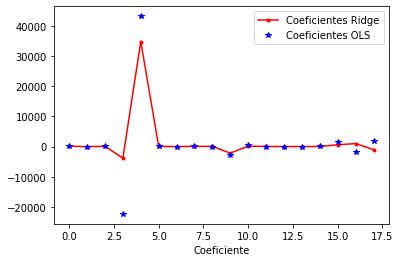

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ridge.coef_,'r.-',label=r'Coeficientes Ridge')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

Vemos que en el caso del dataset para autos con un valor de $\alpha = 1$ se nota una pequeña variación en los parámetros y la precisión del modelo.

El modelo se hace robusto a variaciones de los predictores, pero puerde un poco de precisión (se necesitan más datos para entrenamiento)

En general el hiperparámetro $\alpha$ debe ser  buscado con varios experimentos.


#### Regresión Lasso

Al igual que el algorítmo Ridge, Lasso impone una penalidad sobre la función de error del OLS, pero ésta en cambio está dada por el valor absoluto de los coeficientes, así:
$$\sum (Y_i-\hat Y_i)^2+\alpha \sum |w_i|$$

Esto hace que a diferencia de Ridge que buscaba hacer pequeños los valores de algunos $w_i$, Lasso fuerza a que sean 0.

Así, puede decirse que Ridge es bueno cuando esperamos que todos los predictores tengan una influencia sobre el predictor así sea pequeña, mientras que Lasso se usará cuando esperamos que el numero de predictores relevantes sea pequeño (predictores con peso diferente de 0).

Para implementar una regresión tipo Lasso se sigue el mismo esquema de los casos anteriores.

In [ ]:
from sklearn.linear_model import Lasso

#modelo Lasso
lasso  = Lasso(alpha=5,normalize=True)
lasso.fit(X_train,y_train)
print('R2 Lasso =',lasso.score(X_test,y_test))
print('wi Lasso =',lasso.coef_)
print('w0 Lasso =',lasso.intercept_)

R2 Lasso = 0.8437552627063362
wi Lasso = [-0.00000000e+00 -6.71808960e+00  2.14536878e+01 -5.87434548e+03
  3.90433998e+04  1.47891948e+02  0.00000000e+00  1.19912900e+02
 -0.00000000e+00 -2.75371992e+03  3.54827643e+02  1.85359051e+01
  1.81460341e+00  0.00000000e+00  9.81538834e+01  8.91983309e+02
  0.00000000e+00 -0.00000000e+00]
w0 Lasso = -59858.359145006034


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [ ]:
y_pred = lasso.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred)/y_test.mean())
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))/y_test.mean())

MAE:  0.17015065529083942
RMSE:  0.24776250027565566


In [ ]:
list(zip(variables,lasso.coef_))

[('symboling', -0.0),
 ('normalized-losses', -6.718089600564415),
 ('wheel-base', 21.45368782915319),
 ('length', -5874.345476476112),
 ('width', 39043.39977152044),
 ('height', 147.89194789998834),
 ('curb-weight', 0.0),
 ('engine-size', 119.91289974119378),
 ('bore', -0.0),
 ('stroke', -2753.719922884272),
 ('compression-ratio', 354.8276428739608),
 ('horsepower', 18.535905111932376),
 ('peak-rpm', 1.8146034137825156),
 ('city-mpg', 0.0),
 ('highway-mpg', 98.15388338843812),
 ('city-L/100km', 891.983308651349),
 ('diesel', 0.0),
 ('gas', -0.0)]

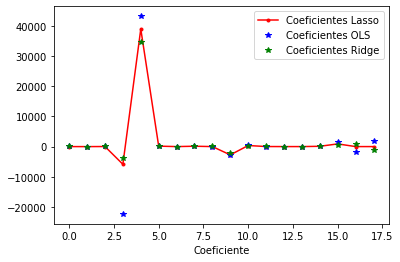

In [ ]:
plt.figure()
plt.plot(lasso.coef_,'r.-',label=r'Coeficientes Lasso')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.plot(ridge.coef_,'g*',label=r'Coeficientes Ridge')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

In [ ]:
print('numero de coeficientes:',len(linearM.coef_))
print('numero de coeficientes diferentes a cero para Ridge:',len(ridge.coef_[ridge.coef_!=0]))
print('numero de coeficientes diferentes a cero para Lasso:',len(lasso.coef_[lasso.coef_!=0]))

numero de coeficientes: 18
numero de coeficientes diferentes a cero para Ridge: 18
numero de coeficientes diferentes a cero para Lasso: 12


Como vemos, Lasso ha disminuído el número de coeficientes mientras que Ridge no lo hace.

La elección entre éstos 3 tipos de regresión lineal depende fuertemente de nuestro dataset (sus correlaciones), nuestro conocimiento del campo (relaciones esperadas de las variables predictoras y la variable diana) y nuestras necesidades computacionales.

# **Gradiente descendente**

Existen formas diferentes de entrenar un modelo de regresión lineal, más adecuado para casos en los que, como mencionamos, hay una gran cantidad de características o demasiadas instancias de entrenamiento para que quepan en la memoria. Un algoritmo con estas características es el del gradiente descendente estocástico (SGD).

La idea general del algoritmo de gradiente descendente es ajustar los parámetros $w_i$ de forma iterativa para minimizar la función de costo. Básicamente, este algoritmo mide el gradiente local de la función de costo con respecto a los parámetros $w_i$, y va en la dirección del gradiente descendente. Una vez que el gradiente es cero se ha alcanzado un mínimo.

<img height="300px" src="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0402.png" alt="Drawing" style="width: 200px;"/>

Un parámetro importante es el tamaño de los pasos, determinado por el hiperparámetro $\eta$, conocido como *tasa de aprendizaje*. Si este es muy pequeño, el algoritmo tomará mucho tiempo en converger al mínimo. Por el contrario si este es muy grande, se corre el peligro de alejarse mucho más del mínimo.


<img height="240px" src="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0407.png" alt="Drawing" style="width: 400px;"/>



Concretamente, el SGD selecciona una instancia aleatoria en el conjunto de entrenamiento en cada paso y calcula los gradientes basado solo en esa instancia. Esto es lo que hace que el algoritmo sea mucho más rápido, ya que tiene muy pocos datos para manipular en cada iteración. 

La clase `LinearRegression` de sklearn que hemos utilizado no utiliza este algoritmo. Para implementar una regresión lineal usando SGD con Scikit-Learn, se puede usar la clase `SGDRegressor`, que por defecto optimiza la función de costo MSE. Vamos a generar algunos datos de aspecto lineal para probar probar el modelo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)

In [ ]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [ ]:
w0, w1 = sgd_reg.intercept_, sgd_reg.coef_

print(w0,w1)

[3.95591997] [2.81570963]


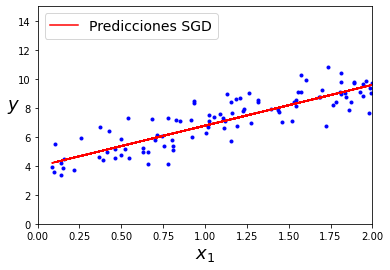

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X, [w0 + w1 * x for x in X], "r-", label="Predicciones SGD")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
sgd_reg = SGDRegressor(max_iter=100, tol=1e-3, penalty=None, eta0=0.03, random_state=42)
sgd_reg.fit(X_train,y_train)

SGDRegressor(eta0=0.03, max_iter=100, penalty=None, random_state=42)

In [ ]:
print('R2 SGD =',sgd_reg.score(X_test,y_test))
print('wi SGD =',sgd_reg.coef_)
print('w0 SGD =',sgd_reg.intercept_)

R2 SGD = -1.6165938426969455e+25
wi SGD = [-5.60291644e+11 -2.35015863e+12 -6.81007011e+11 -3.98786318e+09
 -1.21205200e+10 -1.90704935e+11 -1.90892600e+13  2.17080500e+12
  4.57030264e+10  4.91999392e+10 -1.42592366e+12  5.31438887e+12
  3.41132691e+12 -1.85901691e+12 -1.39494293e+12  2.88446774e+11
 -1.04722782e+11  9.89307356e+10]
w0 SGD = [-5.79204605e+09]


Mean Absolute Percentage Error (MAPE)

In [ ]:
(np.abs(y_pred-y)/y).mean()

1806.9099246438884

Revisar este [link](https://scikit-learn.org/stable/modules/linear_model.html)


In [ ]:
# W * x = y
# F(W * x - y) --> min
#LinearRegression
#Lasso
#Ridge
#SGDRegresion

# **Regresión polinómica**

**Regresión Polinómica**

Hasta ahora nos hemos centrado en la creación de modelos lineales simples y multivariados en donde la relación entre la/las variable/variables predictora/predictoras y la variable blanco corrsponde a una relación lineal. 

No obstante, en algunas ocasiones las tendencias de los datos presentan un comportamiento curvo. En estos caso debemos buscar otro modelo para representar los datos, como es el método de **regresión polinómica**. Dentro de la regreción polinómica, tenemos varias tipos de regresiones dependiendo del grado del polinómio que usemos:

* Cuadrática: Si el polinomio que usamos es grado dos.
* Cúbica: Si el polinomio que usamos es grado tres.
* Cuártica: Si el polinomio que usamos es grado cuatro.
* etc

Podemos llamar a todos estos casos regresiones polinómicas, ya que la relación entre la variable independiente $x$ y la variable dependiente  $y$ se modela mediante un polinomio de grado n en la variable $x$:

\begin{equation}
\hat{y}=w_0x^0+w_1x^1+w_2x^2\cdots w_nx^n = \sum_{i=0}^nw_ix^i
\end{equation}

En donde los $w$'s representan los parámetros del ajuste o la regresión 

**¿Cómo podemos abordar una regresión polinómica?**

Existe un "truco" que nos permite convertir una regresión polinómica en una regresión lineal múltiple. Si definimos:

* $x_1=x$
* $x_2=x^2$
* $x_3=x^3$
* $\cdot$
* $\cdot$
* $\cdot$
* $x_n=x^n$

podemos tratar el problema como una regresión lineal múltiple de la forma

\begin{equation}
\hat{y}=w_0x_0+w_1x_1+w_2x_2\cdots w_nx_n = \sum_{i=0}^nw_ix_i
\end{equation}

Por ende, la regresión polinómica se considera un caso especial de la regresión lineal múltiple, de tal forma que se pueden usar los mismos mecanismos que una regresión lineal para resolver el problema del modelado de los datos.

**Base de datos**

A continuación, tomaremos un conjunto de datos correspondientes a la clasificaciones de consumo de combustibles específicas de los modelos de carros y las emisiones estimadas de dióxido de carbono de nuevos vehiculos ligeros para la venta al por menor en Canada. Para mayor información puede consultar el [link](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64). La base de datos contienen características como:

- **MODELYEAR** Año del vehiculo.
- **MAKE** Marca o fabricante
- **MODEL** Modelo del vehiculo.
- **VEHICLE CLASS** Clase del vehiculo
- **ENGINE SIZE** Tamaño del motor.
- **CYLINDERS** Número de cilindros
- **TRANSMISSION** Tipo de transmisión
- **FUEL CONSUMPTION in CITY(L/100 km)** Consumo en ciudad en litros por cada 100 km.
- **FUEL CONSUMPTION in HWY (L/100 km)** Consumo en autopista en litros por cada 100 km.
- **FUEL CONSUMPTION COMB (L/100 km)** Consumo combinado en litros por cada 100 km.
- **CO2 EMISSIONS (g/km)** Emisión en gramos por kilómetros.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Lectura de los datos
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")

# Inspección visual del dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Escojamos algunas características que estén relacionadas con la emisión de dioxido de carbono. Veamos la matriz de dispersión

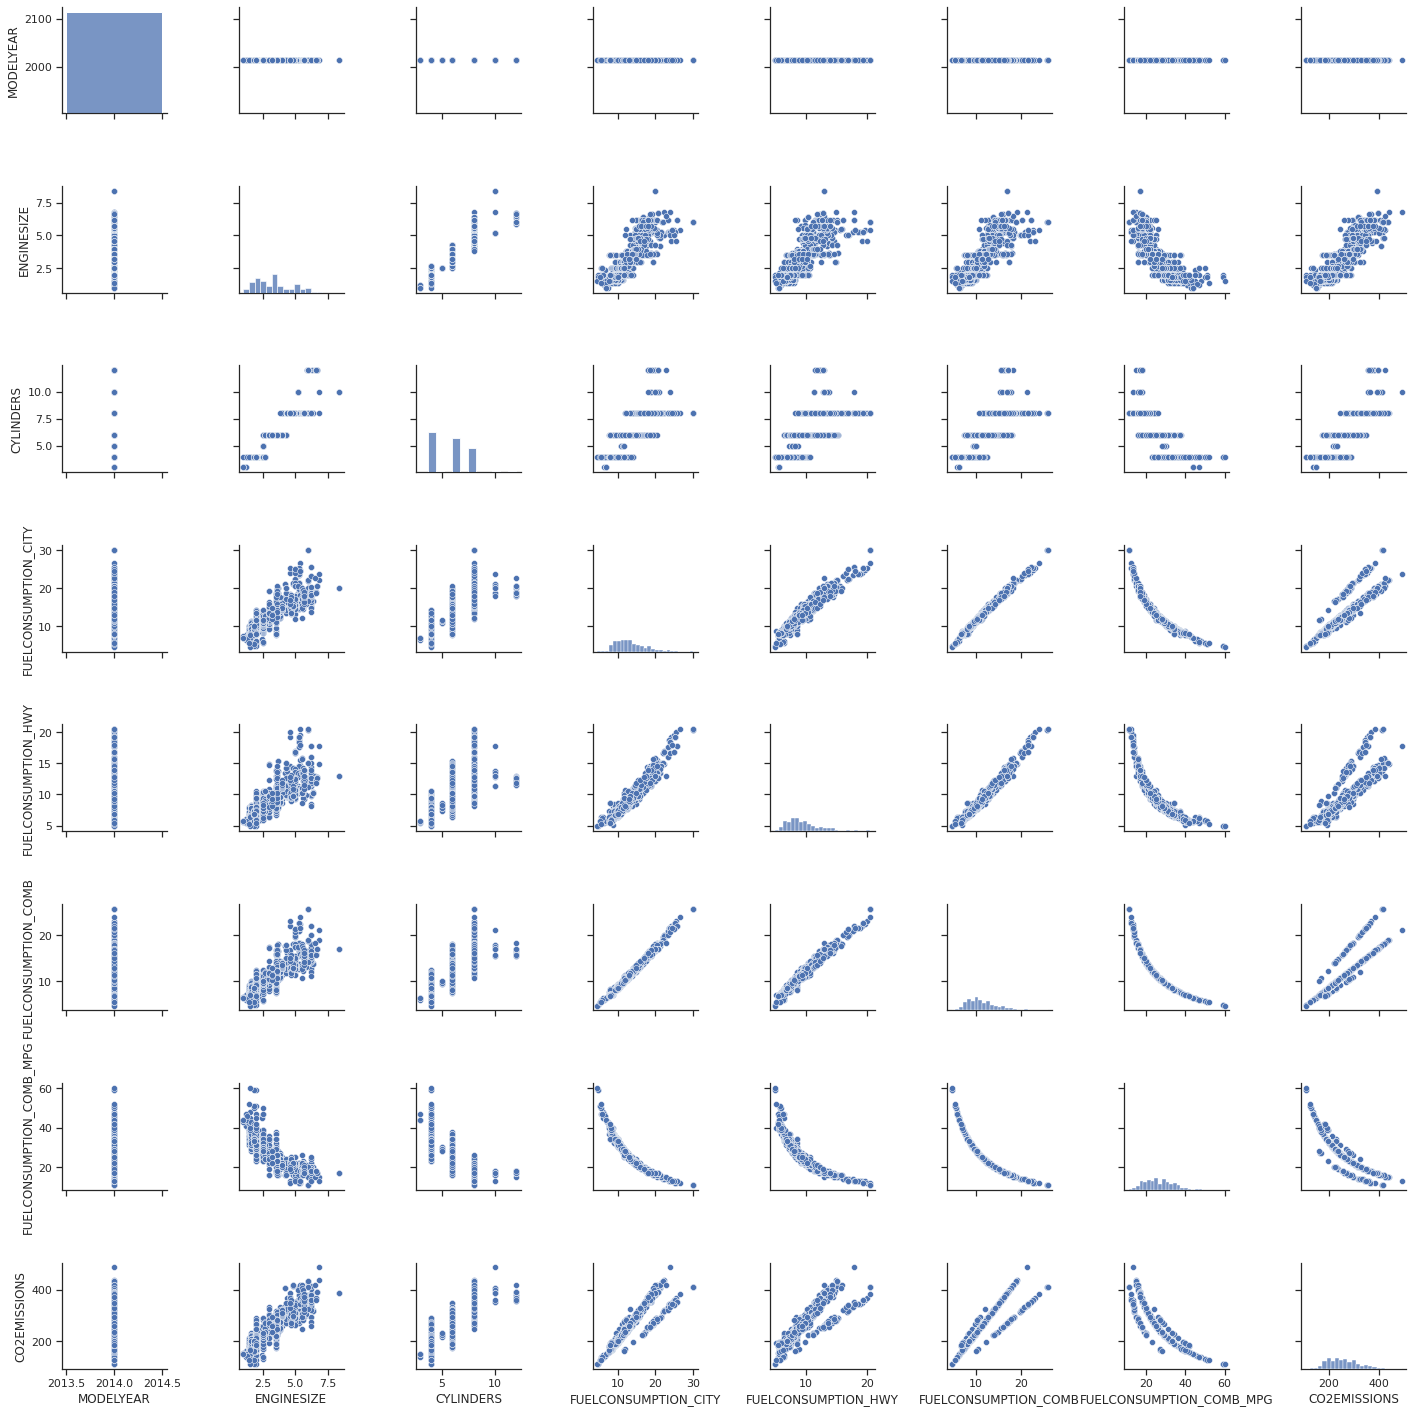

In [ ]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df)

Intentemos construir un modelo, mediante un ajuste polinomial, de la emisión de dióxido de carbono en función de la característica "FUELCONSUMPTION_COMB_MPG"

In [ ]:
# Escogemos nuestra variable predictora como FullConsumption_Comb:
X=df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1)

# Escogemos nuestra variable objetivo como las emisiones de CO2:
y=df['CO2EMISSIONS'].values.reshape(-1,1)

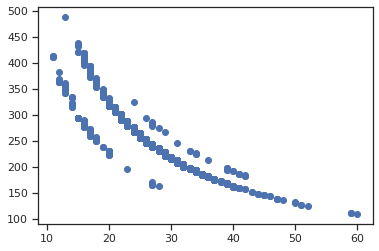

In [ ]:
plt.scatter(X,y)

**Train and test dataframe**

Creemos ahora los grupos de train y test con los cuales entrenaremos y probaremos el modelo, respectivamente. Recordemos que este paso podemos hacerlo mediante la función `train_test_split` de la librería `sklearn.model_selection`:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(853, 1) (853, 1)
(214, 1) (214, 1)


<h2 id="evaluation">Regresión polinómica de los datos:</h2>

Intentemos crear un modelo cuadrático de la emisión de dióxido de carbono en función del tamaño del motor:

$\hat{y} = w_o + w_1 x + w_2 x^2$

En donde x reprenta la variable independiente 'FUELCONSUMPTION_COMB_MPG'. Para resolver este problema usamos la siguiente función:


__PloynomialFeatures()__ es una función de la  librería Scikit-learn, la cual emplea nuevo conjunto de características del conjunto de características original. Es decir, se generará una matriz compuesta de todas las combinaciones polinomiales de las características de grado menor o igual especificado en `degree`. Por ejemplo, suponiendo que el conjunto inicial solo tienen una característica, _FUELCONSUMPTION_COMB_MPG_, entonces, si especificamos `degree=2`, se generarán tres caracteristicas dadas por `degree=0`, `degree=1` y `degree=2`: 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
poly_2 = PolynomialFeatures(degree=2)
train_x_poly_2 = poly_2.fit_transform(x_train)
train_x_poly_2

array([[1.000e+00, 3.600e+01, 1.296e+03],
       [1.000e+00, 2.200e+01, 4.840e+02],
       [1.000e+00, 2.900e+01, 8.410e+02],
       ...,
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 3.300e+01, 1.089e+03],
       [1.000e+00, 1.600e+01, 2.560e+02]])

In [ ]:
train_x_poly_2.shape

(853, 3)

El método **fit_transform** tomo los valores de x y crea una lista, elevando los valores en potencias enteras desde 0 hasta 2.

$
\begin{bmatrix}
    x_1\\
    x_2\\
    \vdots\\
    x_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & x_1 & x_1^2]\\
    [ 1 & x_2 & x_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & x_n & x_n^2]
\end{bmatrix}
$

De lo anterior se puede notar que se tiene la apariencia de un análisis de regresión multiple, lo que corrobora que la regresión polinómica representa un caso especial de la regresión lineal.

A partir de este punto, podemos tratar nuestro problema como un caso de regresión lineal, de tal forma que podemos usar los mismos mecanismos que se emplean para resolver este tipo de problemas. Podemos usar, por ejemplo, la función  __LinearRegression()__ para solucionar nuestro problema:

In [ ]:
clf_2 = LinearRegression()
train_y_ = clf_2.fit(train_x_poly_2, y_train)
# The coefficients
print ('Coefficients: ', clf_2.coef_)
print ('Intercept: ',clf_2.intercept_)

Coefficients:  [[  0.         -15.07165228   0.12895688]]
Intercept:  [557.51502356]


In [ ]:
x_train_2_red=train_x_poly_2[:,1:]
x_train_2_red

array([[  36., 1296.],
       [  22.,  484.],
       [  29.,  841.],
       ...,
       [  20.,  400.],
       [  33., 1089.],
       [  16.,  256.]])

In [ ]:
clf_2 = LinearRegression()
train_y_ = clf_2.fit(x_train_2_red, y_train)
# The coefficients
print ('Coefficients: ', clf_2.coef_)
print ('Intercept: ',clf_2.intercept_)

Coefficients:  [[-15.07165228   0.12895688]]
Intercept:  [557.51502356]


En la celda anterior, __Coefficient__ e __Intercept__ corresponden a los parámetros del ajuste de la linea curva. 

Teniendo en cuenta que estamos tratando con una regresión lineal múltiple con 3 parámetros, los cuales representan la intersección y los coeficientes del hiperplano, sklearn los calcula a partir del nuevo conjunto de características. Veamos como luce el ajuste realizado sobre los datos de "COEMISSION" vs "FUELCONSUMPTION_COMB_MPG":

Text(0, 0.5, 'Emission')

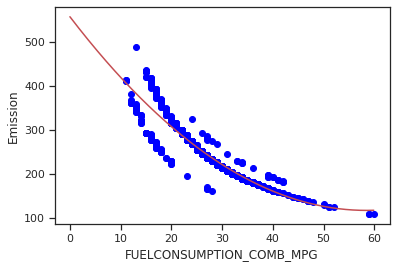

In [ ]:
plt.scatter(X, y,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf_2.intercept_[0]+ clf_2.coef_[0][0]*XX+ clf_2.coef_[0][1]*XX*XX
plt.plot(XX, yy, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")


In [ ]:
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(x_train)

In [ ]:
clf_2.fit(train_x_poly,y_train)

LinearRegression()

Text(0, 0.5, 'Emission')

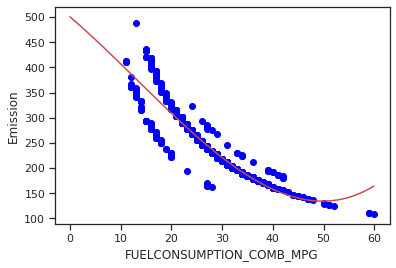

In [ ]:
plt.scatter(X, y,  color='blue')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf_2.intercept_[0]+ clf_2.coef_[0][1]*XX+ clf_2.coef_[0][2]*XX*XX+ clf_2.coef_[0][3]*XX*XX*XX
plt.plot(XX, yy, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluación</h2>

In [ ]:
from sklearn import metrics
#con la regresion lineal

linear = LinearRegression()
linear.fit(x_train,y_train)
y_pred_ = linear.predict(x_train)
y_pred = linear.predict(x_test)

print('MAE: %.3f '% metrics.mean_absolute_error(y_test, y_pred))
#print('MSE: %.3f'% metrics.mean_squared_error(y_test, y_pred))
print('RMSE: %.3f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2(train): %.3f'% metrics.r2_score(y_train, y_pred_))
print('R2(test): %.3f'% metrics.r2_score(y_test, y_pred))

MAE: 17.731 
RMSE: 27.861
R2(train): 0.823
R2(test): 0.812


In [ ]:
#con la regresion polinómica
from sklearn import metrics

linear_fake = LinearRegression()

poly_2 = PolynomialFeatures(degree=2)
x_train_poly_2 = poly_2.fit_transform(x_train)
linear_fake.fit(x_train_poly_2, y_train)
x_test_poly_2 = poly_2.fit_transform(x_test)
test_y_ = linear_fake.predict(x_test_poly_2)
train_y_ = linear_fake.predict(x_train_poly_2)

print('MAE: %.3f' % metrics.mean_absolute_error(test_y_, y_test))
#print('MSE: %.3f' % metrics.mean_squared_error(test_y_, y_test))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(test_y_, y_test)))
print('R2(train): %.3f'% metrics.r2_score(train_y_, y_train))
print('R2(test): %.3f'% metrics.r2_score(test_y_, y_test))

MAE: 13.162
RMSE: 23.588
R2(train): 0.821
R2(test): 0.845


In [ ]:
linear_fake = LinearRegression()

poly_4 = PolynomialFeatures(degree=4)
x_train_poly_4 = poly_4.fit_transform(x_train)
linear_fake.fit(x_train_poly_4, y_train)
x_test_poly_4 = poly_4.fit_transform(x_test)
test_y_ = linear_fake.predict(x_test_poly_4)
train_y_ = linear_fake.predict(x_train_poly_4)

print('MAE: %.3f' % metrics.mean_absolute_error(test_y_, y_test))
#print('MSE: %.3f' % metrics.mean_squared_error(test_y_, y_test))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(test_y_, y_test)))
print('R2(train): %.3f'% metrics.r2_score(train_y_, y_train))
print('R2(test): %.3f'% metrics.r2_score(test_y_, y_test))

MAE: 11.745
RMSE: 23.631
R2(train): 0.833
R2(test): 0.849


## Problema:

Relice un ajuste a un polinomio de grado tres en donde aplique cada uno de los pasos mostrados la regresión polinómica anterior, y evalue si obtiene un mejor modelo.

In [ ]:
# Código
polyM = PolynomialFeatures(degree=8)
train_x_polyM = polyM.fit_transform(x_train)

clfM = LinearRegression()
train_yM_ = clfM.fit(train_x_polyM, y_train)

#coeficientes
print ('Coefficients: ', clfM.coef_)
print ('Intercept: ',clfM.intercept_)

Coefficients:  [[ 0.00000000e+00 -8.83534730e-01 -6.73043418e+00  1.05710880e+00
  -7.40208934e-02  2.73974033e-03 -5.56487071e-05  5.86835583e-07
  -2.51272514e-09]]
Intercept:  [520.15767197]


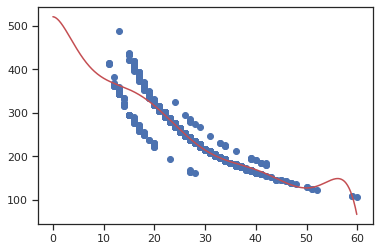

MAE: 11.397 
MSE: 555.640
RMSE: 23.572
R2-score(train): 0.859
R2-score: 0.866


In [ ]:
#graficación
plt.scatter(X, y, color="b")
XX = np.arange(0.0, 60.0, 0.1)
Yi = sum([clfM.coef_[0][i]*XX**i for i in range(1,9)])
Y = clfM.intercept_ + Yi
plt.plot(XX,Y,"r-" )
plt.show()

test_x_polyM = polyM.fit_transform(x_test)
test_yM_ = clfM.predict(test_x_polyM)

print('MAE: %.3f ' % metrics.mean_absolute_error(y_test, test_yM_))
print('MSE: %.3f' % metrics.mean_squared_error(y_test, test_yM_))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, test_yM_)))
print('R2-score(train): %.3f'% metrics.r2_score(y_train, clfM.predict(train_x_polyM)))
print('R2-score: %.3f'% metrics.r2_score(y_test, test_yM_))

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

# Código
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(x_train)

clf3 = LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, y_train)

#coeficientes
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

#graficación
plt.scatter(X, y, color="b")
XX = np.arange(0.0, 60.0, 0.1)
Y = clf3.intercept_ + clf3.coef_[0][1]*XX + clf3.coef_[0][2]*XX**2 + clf3.coef_[0][3]*XX**3
plt.plot(XX,Y,"r-" )
plt.show()

test_x_poly3 = poly3.fit_transform(x_test)
test_y3_ = clf3.predict(test_x_poly3)

print('MAE: %.3f ' % metrics.mean_absolute_error(y_test, test_y3_))
print('MSE: %.3f' % metrics.mean_squared_error(y_test, test_y3_))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, test_y3_)))
print('R2-score: %.3f'% metrics.r2_score(y_test, test_y3_))

--->

# **Modelos no lineales**

Como bien sabemos, si los datos no presentan una tendencia lineal entre las características y las variables objetivo, debemos buscar ajustes a funciones no lineales para la construcción de modelos. Veamos algunas funciones de uso comun para el ajuste de modelos y un ejemplo práctico del crecimiento del producto interno bruto chino.

Las regresiones no lineales representan una relación entre variabres independientes $x$'s y una variable dependiente $y$, lo que resulta en un modelado mediante una función no lieal de los datos. En principio, cualquier relación que no es lineal, puede representarce mediante un polinomio de grado $k$. Por ejemplo: 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Además, las funciones no lineales pueden tener elementos exponenciales, logarítmicos, fracciones, entre otros. Por 
ejemplo, una función de la forma:

$$ y = \log(a x^5 + b x^3 + c x + d)$$

## Función exponencial

Una función exponencial de base c, se define como 

$Y = a + b c^X$

en donde $b\neq0$, $c > 0$ , $c\neq1$, y la X es un número real. La base, $c$, es una constante y el exponente, $X$, es una variable. Un ejemplo gráfico de la función se presenta a continuación:

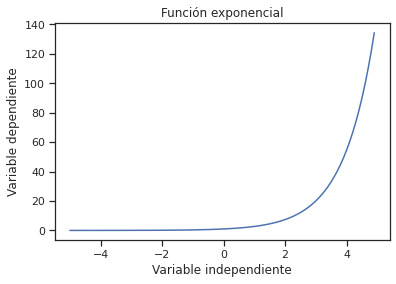

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Variable dependiente')
plt.xlabel('Variable independiente')
plt.title('Función exponencial')
plt.show()

## Función logarítmica

La función logarítmica es la función inversa de la función exponecial, y se representa como:

\begin{equation}
y = \log(X)
\end{equation}

Una representación gráfica de esta función se muestra a continuación:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


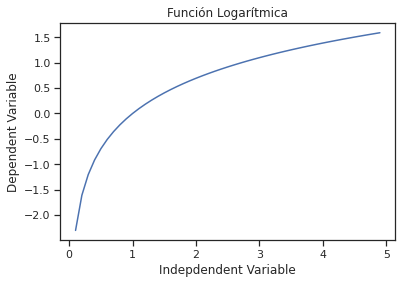

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title('Función Logarítmica')
plt.show()

## Función sigmoide/logística

La función sigmoide tiene la forma 

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

Y veremos, más adelante, en este curso, una aplicación en la la regresión logística. Una representación gráfica de la función se presenta a continuación:

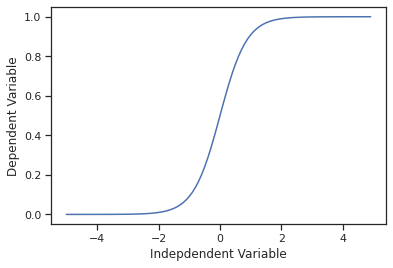

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-1/(1+np.power(10, X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

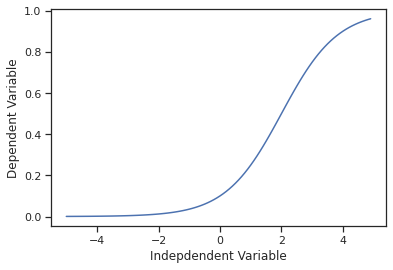

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-1/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Ejemplo de regresión no lineal:

Intentemos encontra un modelo no lineal para representar los datos del producto interno bruto de China, entre los años 1960 a 2014. El dataset se presenta a continuación:

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Gráfica del dataset ###

Veamos como luce el dataset:

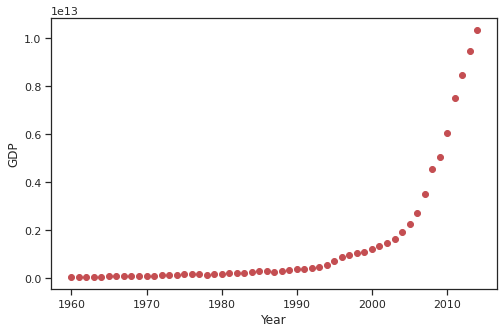

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Esta gráfica parece seguir un comportamiente logístico o exponencial. El crecimiento lento del PIB empieza alrededor del año 1995, y a partir del año 2005 empieza a ser significativo, para luego caer muy poco alrededor del 2010. 

### Determinación del modelo ###

De una inspección inical, podemos determinar que una aproximación logística podría ser adecuada, ya que empieza a crecer lentamente, y aumenta a mitad de camino, para desacelerarse un poco al final. Veamos la siguiente función:

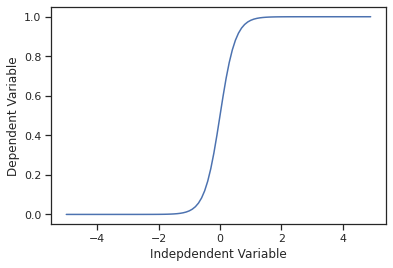

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-4*X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

De la ecuación de la función logística:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

Tenemos que

$\beta_1$: contrala la inclinación de la curva,

$\beta_2$: proyecta la curva en x.

### Construcción del modelo###

Construyamos nuestro modelo de regresión e inicialicemos los parámetros:

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Veamos un ajuste preliminar "a  mano" de una función sigmoide a los datos

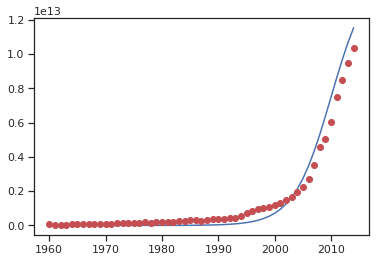

In [ ]:
beta_1 = 0.30
beta_2 = 2010.0

#logistica
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot predicción inicial
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

El objetivo en este modelo es encontrar los parámetros que mejor ajustan la curva a los datos. Procedamos a normalizarlos:

In [ ]:
# normalicemos los datos
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

Usemos el método __curve_fit__ `scipy`, que usa un ajuste de mínimos cuadrados no lineal para ajustar nuesta función sigmoide a los datos. El algoritmo ajusta iterativamente los parámetros, de tal forma que la suma de los residuos cuadrados $sig(x_{data}, *popt) - y_{data}$ se minimiza.

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
popt, pcov = curve_fit(sigmoid, xdata, ydata)
popt

array([690.45301897,   0.99720713])

In [ ]:
#imprimamos los parámetros
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


In [ ]:
popt

array([690.45301712,   0.99720713])

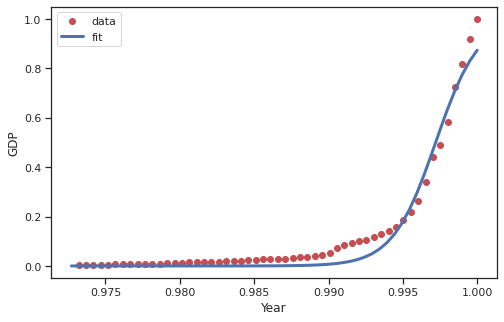

In [ ]:
# Visualización del modelo
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Problema:
Evalue la precisión del modelo creado anteriormente.

In [ ]:
#Reshape data
X=xdata.reshape(-1,1)
y=ydata.reshape(-1,1)

In [ ]:
#Split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdata,ydata, test_size=0.2, random_state=1)

In [ ]:
# crear el modelo
popt, pcov = curve_fit(sigmoid, x_train, y_train)

In [ ]:
popt

array([667.12846661,   0.99720024])

In [ ]:
# predicciones sobre el dataset de test
y_hat = sigmoid(x_test, *popt)

In [ ]:
# Evaluacion
print("MAE: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("RMSE: %.2f" % np.sqrt(np.mean((y_hat - y_test) ** 2)))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , y_test) )

MAE: 0.04
RMSE: 0.05
R2-score: 0.97


In [ ]:
def exponencial(x,b1,b2,b3):
  return b1+np.exp(b2*x-b3)

In [ ]:
popt, pcov = curve_fit(exponencial, x_train, y_train)

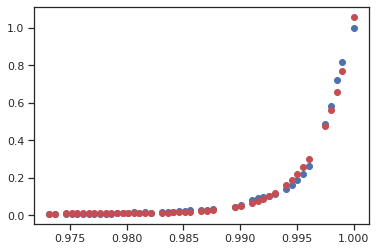

In [ ]:
y_pred=exponencial(x_train,*popt)
plt.scatter(x_train,y_train,c='b')
plt.scatter(x_train,y_pred,c='r')

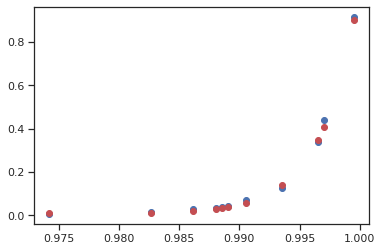

In [ ]:
y_pred=exponencial(x_test,*popt)
plt.scatter(x_test,y_test,c='b')
plt.scatter(x_test,y_pred,c='r')

In [ ]:
# Evaluacion
print("MAE: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("RMSE: %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

MAE: 0.01
RMSE: 0.01
R2-score: 1.00


Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

#Reshape data
X=xdata.reshape(-1,1)
y=ydata.reshape(-1,1)

#Split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdata,ydata, test_size=0.2, random_state=1)

# crear el modelo
popt, pcov = curve_fit(sigmoid, x_train, y_train)

# predicciones sobre el dataset de test
y_hat = sigmoid(x_test, *popt)

# Evaluacion
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , y_test) )
--->

# **Redes elásticas**


Como vimos anteriormente, podemos generar penalizaciones a las regresiones lineales haciendo cambios en su metrica de error.

Para la regresión Ridge se penaliza con: $\alpha \sum w_i^2$ (penalidad $L_2$), mientras que para Lasso se tiene que: 
$\alpha \sum |w_i|$ (penalidad $L_1$). Cada una de ellas tenía sus pro y sus contra. Pero es posible hacer una combinación de ambos metodos.

A las regresiones que usan una combinación de ambas penalidades se les conoce como **ElasticNet** (Redes elásticas) y definimos su error como:
$$\sum (Y_i- \hat Y_i)^2+\alpha \rho \sum |w_i| + \frac{\alpha(1-\rho)}{2}\sum w_i^2. $$

Note que cuando $ \rho=1$ tenemos la regresión Lasso, y con $\rho=0$ tendremos la de Ridge, por tanto en las redes elásticas $0\leq \rho\leq1$.

Hemos dado un paso más en la complejización del modelo ya que ahora debemos preocuparnos por el ajuste de 2 hiperparámetros para seleccionar el mejor modelo.

Para usar las redes elásticas en sklearn debemos importar la función 'ElasticNet' del modulo de modelos lineales.

In [ ]:
from sklearn.linear_model import ElasticNet

En la implementación de sklearn tenemos los hiperparámetros 'alpha' y 'l1_ratio' ($\rho$ en nuestra ecuación), con ellos controlaremos el comportamiento del regresor.

Tenga en cuenta que para valores de *l1_ratio* $\leq0.01$ el algoritmo de sklearn no es estable si usamos el valor de $\alpha$ por defecto y se hace necesario que nosotros mísmos ajustemos el valor. 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

df.dropna(inplace=True)

X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values

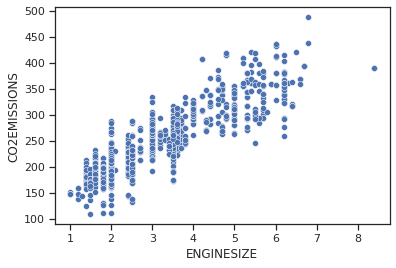

In [ ]:
sns.scatterplot(data=df,x='ENGINESIZE',y='CO2EMISSIONS')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn import metrics

In [ ]:
#seleccionamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
#entrenamos el modelo
elastic = ElasticNet(alpha=0.001,l1_ratio=0.5,normalize=True)
#elastic2 = ElasticNet(alpha=0.1,l1_ratio=1,normalize=True)

In [ ]:
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


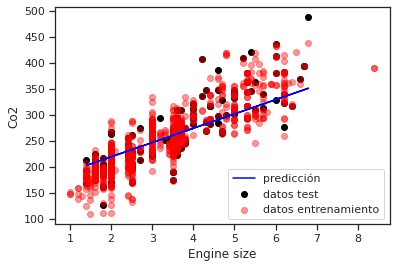

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='best')
plt.xlabel(r'Engine size')
plt.ylabel(r'Co2')
plt.show()

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', elastic.score(X_test,y_test))

MAE:  24.359335099060388
MSE:  1137.1939714027965
RMSE:  33.72230673312246
R2:  0.6959085029629617


In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred)/y_test.mean())
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_test.mean())
print('R2: ', elastic.score(X_test,y_test))

MAE:  0.09491974928893321
RMSE:  0.1314039520182124
R2:  0.6959085029629617


De nuevo, los hiperparámetros debemos seleccionarlos con una busqueda para determinar una buena combinación.

(array([ 4.,  6., 40., 73., 44., 30.,  9.,  2.,  4.,  2.]),
 array([-87.15117586, -64.69247843, -42.233781  , -19.77508356,
          2.68361387,  25.1423113 ,  47.60100873,  70.05970616,
         92.51840359, 114.97710102, 137.43579845]),
 <a list of 10 Patch objects>)

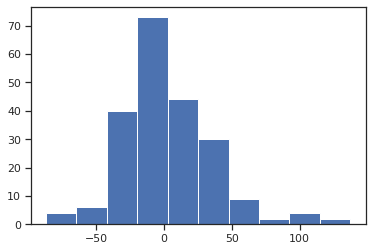

In [ ]:
plt.hist((y_test-y_pred))

#### Ejercicio:

1. En el dataset de autos (a1): elimine los datos faltantes, convierta las variables categoricas en variables dummies (a2), y separe el dataset en datos de entrenamiento y prueba.

2. Use dos ciclos 'for' para recorrer $\alpha$ en la lista [0.01,0.1,1,10,100,1000] y l1_ratio en [0.1,0.3,0.6,0.9,0.99,0.999], entrenando un modelo ElasticNet para las combinaciones de éstos y evaluandolo con RMSE. Guarde el valor de cada RMSE en un arreglo.

3. Haga un mapa de calor (a3) con los valores de $\alpha$ y l1_ratio del punto anterior y los valores de RMSE.


a1. 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

a2. `pd.get_dummies()`

a3. `sns.heatmap(Matriz, xticklabels, yticklabels, annot=True)`

In [ ]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [ ]:
#eliminamos datos nulos
df.dropna(inplace=True)

In [ ]:
#creamos las variables dummies
df_dummies = pd.get_dummies(df)

In [ ]:
df_dummies.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_High,horsepower-binned_Low,horsepower-binned_Medium
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,...,0,0,0,0,1,0,0,0,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,...,0,0,0,0,1,0,0,0,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,...,0,0,0,0,1,0,0,0,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,...,0,0,0,0,1,0,0,0,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
#separamos el dataset
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
#Creamos la lista de alphas, l1_ratios y el arreglo de RMESs
alphas =  [0.01,0.1,1,10,100,1000] 
l1s = [0.1,0.3,0.6,0.9,0.99,0.999]
RMSEs = []

In [ ]:
#Recorremos los valores en los arreglos
for alpha in alphas:
  for l1 in l1s:
    elastic = ElasticNet(alpha=alpha,l1_ratio=l1,normalize=True)
    elastic.fit(X_train,y_train)
    y_pred = elastic.predict(X_test)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    #el metodo append agrega un valor al arreglo  
    RMSEs.append(RMSE)
RMSEs = np.array(RMSEs)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If

In [ ]:
RMSEs

array([3103.17682267, 3004.6980747 , 2821.87273673, 2528.92450408,
       2432.27269759, 2443.15673968, 5201.26387992, 4849.36771684,
       4156.80676467, 3149.20750214, 2528.52041451, 2432.1554555 ,
       7735.80833997, 7584.96120184, 7133.37383024, 5360.03077539,
       3155.45845371, 2527.31010492, 8275.43145385, 8257.23204069,
       8196.64239704, 7805.6890514 , 5434.11981087, 3239.0011397 ,
       8335.36154143, 8334.02659625, 8329.51984294, 8298.04562031,
       7952.0280835 , 6184.60463446, 8341.41590842, 8341.65667536,
       8341.88909197, 8341.88909197, 8341.88909197, 8341.88909197])

$$\sum (Y_i- \hat Y_i)^2+\alpha \rho \sum |w_i| + \frac{\alpha(1-\rho)}{2}\sum w_i^2. $$

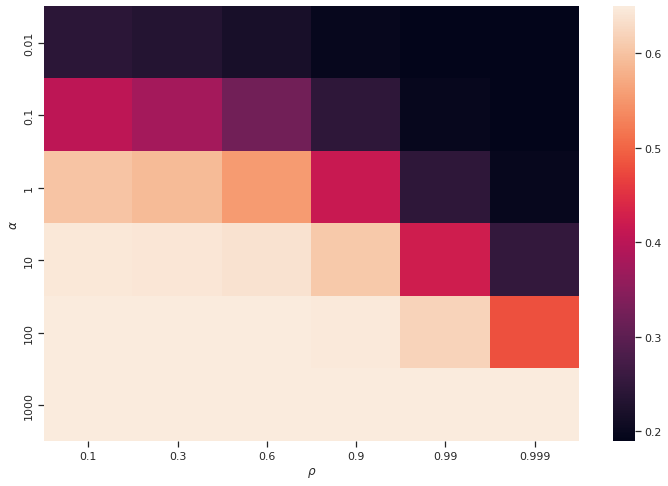

In [ ]:
#3
import seaborn as sns
#pasamos de un arreglo a una matriz para usarlo en el mapa de calor
RMSEs = RMSEs.reshape(len(alphas),len(l1s))
fig,ax = plt.subplots(1,figsize=(12,8))
sns.heatmap(RMSEs/y_test.mean(), yticklabels=alphas, xticklabels=l1s,ax=ax)
plt.xlabel(r'$\rho$',fontsize=12)
plt.ylabel(r'$\alpha$',fontsize=12)
plt.show()

Grid Search

Hacer doble click **aquí** para ver la solución:

<!-- Respuesta:


#1
#eliminamos datos nulos
df.dropna(inplace=True)
#creamos las variables dummies
df_dummies = pd.get_dummies(df)
#separamos el dataset
X = df_dummies.drop('price',axis=1)
y = df_dummies['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#2
#Creamos la lista de alphas, l1_ratios y el arreglo de RMESs
alphas =  [0.01,0.1,1,10,100,1000] 
l1s = [0.1,0.3,0.6,0.9,0.99,0.999]
RMSEs = []

#Recorremos los valores en los arreglos
for alpha in alphas:
  for l1 in l1s:
    elastic = ElasticNet(alpha=alpha,l1_ratio=l1,normalize=True)
    elastic.fit(X_train,y_train)
    y_pred = elastic.predict(X_test)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    #el metodo append agrega un valor al arreglo  
    RMSEs.append(RMSE)
RMSEs = np.array(RMSEs)

#3
import seaborn as sns
#pasamos de un arreglo a una matriz para usarlo en el mapa de calor
RMSEs = RMSEs.reshape(len(alphas),len(l1s))
sns.heatmap(RMSEs, xticklabels=alphas, yticklabels=l1s,annot=True )

--->

# **Máquinas de Soporte Vectorial (Support Vector Machine SVM)**

SVM son algoritmos de Machine Learning desarrollados por  Vladimir Vapnik y su equipo en los laboratorios AT&T. Estos algoritmnos sirven tanto para solucionar problemas de clasificación como de regresión. 



## Intuición inicial

Supogamos que tenemos un dataset con dos características y  queremos clasificar con una línea recta (hiperplano en el caso de mas dimensiones) a que grupo (rojos o azules) corresponde cada uno. 

<p><img height="230px" src="https://miro.medium.com/max/300/0*9jEWNXTAao7phK-5.png"  hspace="10px" vspace="0px">
  <img height="230px" src="https://miro.medium.com/max/300/0*0o8xIA4k3gXUDCFU.png"  hspace="10px" vspace="0px"></p>



En la figura de la izquierda, podemos ver que tenemos "infinitas" rectas que sirven para clasificar los dos grupos. En SVM escogemos la recta (hiperplano) que maximiza el margen, entendiendo como el margen la distacia maxima que hay entre los puntos de las dos clases. Los puntos que están mas cerca de la frontera (línea punteada) se conocen como los vectores de soporte, estos pueden quedar sobre la línea de frontera o fuera de ella. En la figura de la derecha son datos que aparecen con el color relleno.  

## Regresión

Los regresores basado en máquinas de soporte vectorial se suele denota como SVR (Support Vector Regressor)

### SVR Lineal

En este caso, la idea es seleccionar el hiperplano regresor que mejor se ajuste a nuestro conjunto de datos de entrenamiento. Ahora no disponemos de clases
para separar. La idea se basa en considerar una distancia margen ε, de modo que esperamos que todas las instancias se encuentren en una banda o tubo entorno a nuestro hiperplano, es decir, que disten una cantidad menor de ε del hiperplano. A
la hora de definir el hiperplano sólo se consideran las instancias que disten más de ε de nuestro hiperplano. En este caso esas instancias serán los considerados como
vectores soporte.


<p><img height="300px" src="https://www.saedsayad.com/images/SVR_2.png"  align="center" vspace="0px">



La constante C > 0 determina el equilibrio entre la regularidad de la predicción hecha por el hiperplano y la cuantía
hasta la cual toleramos desviaciones mayores que ε. Un valor muy grande de la constante C, en el caso límite (C → ∞)
estaríamos considerando que el conjunto está perfectamente representado por
nuestro hiperplano predictor (ξi → 0). Por contra, un número demasiado pequeño
para C permitiría valores de ξi elevados, es decir, estaríamos admitiendo un número
muy elevado de ejemplos mal representados.

In [ ]:
import sklearn.svm as svm  
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.shape

(1067, 13)

Hagamos un primer ajuste lineal. En la matriz de dispersión vimos que existe una relación lineal entre la emisión de CO2 y el tamaño del motor:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


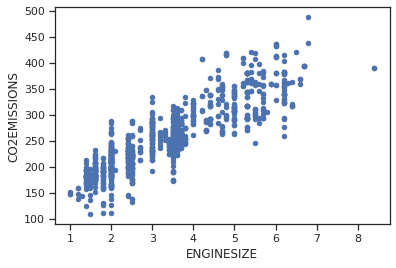

In [ ]:
df.plot(x='ENGINESIZE', y='CO2EMISSIONS',kind='scatter')

In [ ]:
X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [ ]:
estimator=svm.LinearSVR(C=10)

In [ ]:
estimator.fit(X_train, y_train)

LinearSVR(C=10)

In [ ]:
print('R2-train: ', estimator.score(X_train, y_train))
print('R2-test: ', estimator.score(X_test, y_test))

R2-train:  0.7757904003596123
R2-test:  0.7255020793297488


In [ ]:
y_pred = estimator.predict(X_test)

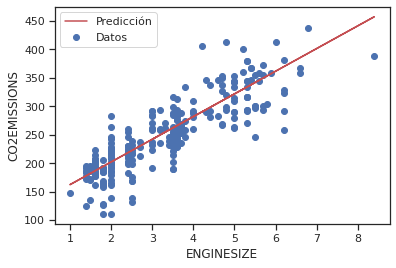

In [ ]:
plt.scatter(X_test,y_test, label='Datos')
plt.plot(X_test,y_pred, color='r', label='Predicción')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

In [ ]:
print('MAE: %.3f ' % metrics.mean_absolute_error(y_test, y_pred))
print('MSE: %.3f' % metrics.mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 25.247 
MSE: 1118.697
RMSE: 33.447


Con SVR se pueden hacer regresiones multilineales. 

In [ ]:
X = df[['ENGINESIZE','FUELCONSUMPTION_CITY','CYLINDERS']]
y = df['CO2EMISSIONS'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [ ]:
estimator=svm.LinearSVR(C=5)
estimator.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(C=5)

In [ ]:
estimator.coef_

array([ 5.78003364, 16.49315792, -1.23656612])

In [ ]:
estimator.intercept_

array([32.12349589])

In [ ]:
print('R2_train: ', estimator.score(X_train, y_train))
print('R2_test: ', estimator.score(X_test, y_test))

R2_train:  0.7471796598968583
R2_test:  0.7593494818149257


In [ ]:
y_pred=estimator.predict(X_test)

In [ ]:
print('MAE: %.3f ' % metrics.mean_absolute_error(y_test, y_pred))
print('MSE: %.3f' % metrics.mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 14.293 
MSE: 980.754
RMSE: 31.317


Cuando el número de caracteríticas es mayor a dos y no se puede visualizar el resultado de la predicción, podemos graficar los resultados de los datos de prueba con los obtenidos a partir de la predicción. La interpretación de esta gráfica se puede entender como que una buena predicción se da para aquellos que se encuentren cerca de un línea con pendiente 1.

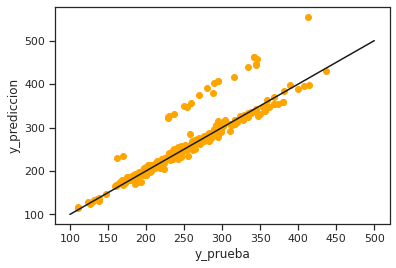

In [ ]:
plt.scatter(y_test,y_pred,color='orange') #y_test= A*y_pred + ERROR --> A=1,ERROR=0

plt.plot(np.arange(100,600,100),np.arange(100,600,100), 'k')
plt.xlabel('y_prueba')
plt.ylabel('y_prediccion')
plt.show()

### SVR con kernel

Para el caso en el que la función que se desea ajustar no puede ser ajustada con una recta, el método que se utiliza es mapear los puntos a una mayor dimensionalidad en la que si se pueda hacer el ajuste lineal y luego la solución dada se mapea de regreso al espacio original. 


<p><img height="300px" src="https://www.saedsayad.com/images/SVR_5.png"  align="center" vspace="0px">



x1, x2, x3
Polinomiales degree=3

x1^3 x2^3 x3^3

x1^2 x2, x1^2 x3, x2^2 x1, x2^2 x3, x3^2 x1, x3^2 x2

x1^2, x2^2, x3^2

x1 x2, x1 x3, x2 x3

La posibles funciones de Kernel integrados en scikitlearn son: 'linear', 'poly', 'rbf', 'sigmoid'

Analicemos el caso de dos variables que es posible ver que no tienen una dependencia lineal, como FUELCONSUMPTION_COMB_MPG, FUELCONSUMPTION_CITY. Observe los resultados que se obtienen usando diferentes kernel.

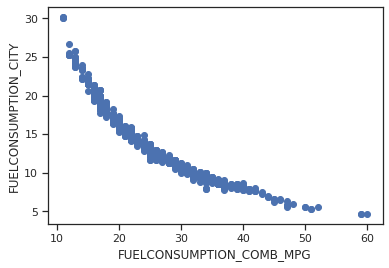

In [ ]:
plt.scatter(df['FUELCONSUMPTION_COMB_MPG'], df['FUELCONSUMPTION_CITY'])
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('FUELCONSUMPTION_CITY')
plt.show()

### Kernel lineal

In [ ]:
X = df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1)
y = df['FUELCONSUMPTION_CITY'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [ ]:
estimator=svm.SVR(kernel='linear')
estimator.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
y_pred = estimator.predict(X_test)

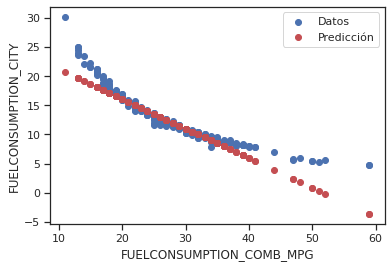

In [ ]:
plt.scatter(X_test,y_test, label='Datos')
plt.scatter(X_test,y_pred, color='r', label='Predicción')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('FUELCONSUMPTION_CITY')
plt.legend()
plt.show()

In [ ]:
print('R2_train: ', estimator.score(X_train, y_train))
print('R2_test:', estimator.score(X_test, y_test))

R2_train:  0.8698299520136046
R2_test: 0.8364795427307106


In [ ]:
y_pred=estimator.predict(X_test)
print('MAE: %.3f ' % metrics.mean_absolute_error(y_test, y_pred))
print('MSE: %.3f' % metrics.mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))                      

MAE: 0.972 
MSE: 2.796
RMSE: 1.672


### Kernel rbf

RBF: Radial Basis Function

In [ ]:
X = df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1)
y = df['FUELCONSUMPTION_CITY'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [ ]:
estimator=svm.SVR(kernel='rbf')
estimator.fit(X_train, y_train)

SVR()

In [ ]:
estimator.dual_coef_.shape

(1, 607)

In [ ]:
y_pred = estimator.predict(X_test)

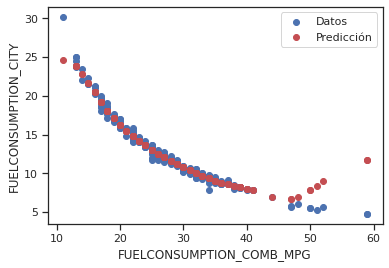

In [ ]:
plt.scatter(X_test,y_test, label='Datos')
plt.scatter(X_test,y_pred, color='r', label='Predicción')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('FUELCONSUMPTION_CITY')
plt.legend()
plt.show()

In [ ]:
print('R2_train:', estimator.score(X_train, y_train))
print('R2_test:', estimator.score(X_test, y_test))

R2_train: 0.9781758461610846
R2_test: 0.9555070494234708


In [ ]:
print('MAE: %.3f ' % (metrics.mean_absolute_error(y_test, y_pred)))
print('RMSE: %.3f' % (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE: 0.401 
RMSE: 0.872


In [ ]:
estimator=svm.SVR(kernel='rbf',C=3)
estimator.fit(X_train, y_train)

SVR(C=3)

In [ ]:
y_pred = estimator.predict(X_test)

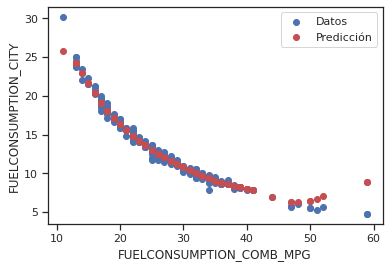

In [ ]:
plt.scatter(X_test,y_test, label='Datos')
plt.scatter(X_test,y_pred, color='r', label='Predicción')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('FUELCONSUMPTION_CITY')
plt.legend()
plt.show()

In [ ]:
print('R2_train:', estimator.score(X_train, y_train))
print('R2_test:', estimator.score(X_test, y_test))

R2_train: 0.9847207903211792
R2_test: 0.978429857651997


In [ ]:
print('MAE: %.3f ' % (metrics.mean_absolute_error(y_test, y_pred)))
print('RMSE: %.3f' % (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE: 0.343 
RMSE: 0.607


1. Y (target) -> regresión

2. Hacer un LR

2a. Relaciones altamente lineales y-x y el R2 paso 2 es mayor 0.5 - 0.8 (colinealidad) 
- Outliers --> Ridge/Lasso (Mejoras de metricas)
- Red elastica

2b. Relaciones no simpre lineales y el R2 paso 2 (>0.5) Metricas grandes, errores no simetricos (no linealidad)
- Features a Polinomios
- SVR (kernel=rbf)


# **Regresión logistica tipos de fronteras**

### Regresión logística en un problema de clasificación binaria con frontera de decisión no lineal I.

Para evaluar los casos en el que una regresión logística tiene un buen desempeño, veamos el siguiente caso de distribución de datos generadas en python:

In [193]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

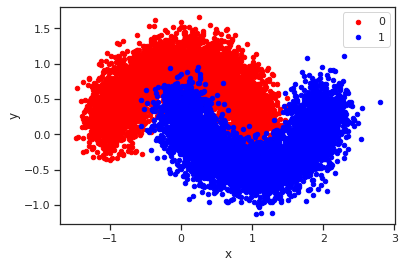

In [194]:
# generate 2d classification dataset
X, y = make_moons(n_samples=10000, noise=0.2)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [195]:
# División de los datos en subconjuntos de entrenamiento/evaluación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 2) (8000,)
Test set: (2000, 2) (2000,)


[(-1.1330790432463487, 1.6660074454996154),
 Text(0, 0.5, '$X_2$'),
 (-1.4848999882849443, 2.7973099832511137),
 Text(0.5, 0, '$X_1$'),
 None]

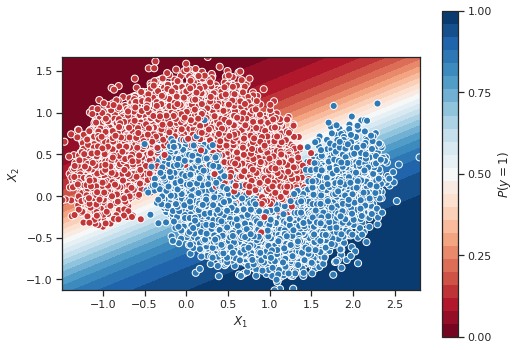

In [196]:
# Ajuste del modelo.
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)

xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[0], X.max(0)[0]), ylim=(X.min(0)[1], X.max(0)[1]),
       xlabel="$X_1$", ylabel="$X_2$")

In [197]:
LR.score(X,y)
#print("Los puntajes de la validación cruzada son:", cv_scores)

0.8604

**Conclusión:** En los casos en donde la **frontera de decisión** no es lineal y los datos estan distribuidos en "cachos de luna", el algoritmo de desición logística presenta un desempeño menos preciso; en este caso, hemos obtenido un porcentaje de clasificaciones correctas del 86%, mediante una evaluación cruzada con tres folds.

### Regresión logística en un problema de clasificación binaria con frontera de decisión no lineal II.

Veamos un último caso en el que los datos están organizados en anillos:

In [198]:
from sklearn.datasets import make_circles

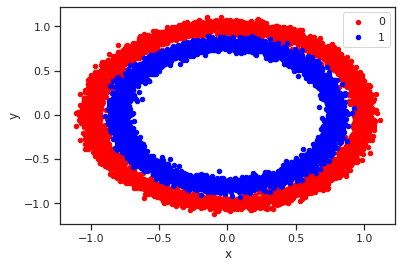

In [199]:
# generate 2d classification dataset
X, y = make_circles(n_samples=10000, noise=0.04)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 2) (8000,)
Test set: (2000, 2) (2000,)


In [201]:
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)

[(-1.1262282867835791, 1.1093516427711996),
 Text(0, 0.5, '$X_2$'),
 (-1.1119626632471298, 1.1165686154923788),
 Text(0.5, 0, '$X_1$'),
 None]

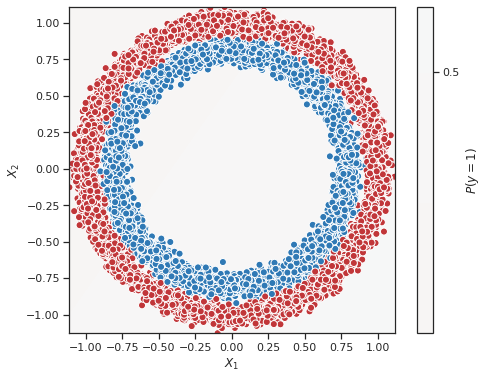

In [202]:
xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[0], X.max(0)[0]), ylim=(X.min(0)[1], X.max(0)[1]),
       xlabel="$X_1$", ylabel="$X_2$")

En este caso, asigna a todos los puntos una probabilidad cercana a 0.5, lo que indica una mala clasificación, ya que todos los puntos estarían dentro de la frontera de decisión.

In [203]:
#cv_scores = cross_val_score(LR,X,y)
#print("Los puntajes de la validación cruzada son:", cv_scores)
LR.score(X,y)


0.4822

**Conclusión:** En los casos en donde la **frontera de decisión** no es lineal para datos distribuidos en anillos concentricos, el algoritmo de regresión logística presenta un desempeño muy pobre; en este caso, hemos obtenido un porcentaje de clasificaciones correctas del 49%, mediante una evaluación cruzada con tres folds.

## Regresión Logística con Features Polinomiales

In [204]:
Xpoly = np.c_[X,X**2]

In [205]:
X

array([[ 0.07858139,  0.81581226],
       [-0.63847   , -0.70416464],
       [-0.66359468,  0.42802915],
       ...,
       [-0.80274003,  0.43125207],
       [ 0.36228676,  0.92907016],
       [-0.9606394 ,  0.14189404]])

In [206]:
Xpoly

array([[ 0.07858139,  0.81581226,  0.00617503,  0.66554964],
       [-0.63847   , -0.70416464,  0.40764394,  0.49584784],
       [-0.66359468,  0.42802915,  0.44035791,  0.18320896],
       ...,
       [-0.80274003,  0.43125207,  0.64439156,  0.18597835],
       [ 0.36228676,  0.92907016,  0.13125169,  0.86317137],
       [-0.9606394 ,  0.14189404,  0.92282805,  0.02013392]])

In [207]:
Xpoly.shape, X.shape

((10000, 4), (10000, 2))

In [208]:
X_train, X_test, y_train, y_test = train_test_split(Xpoly, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 4) (8000,)
Test set: (2000, 4) (2000,)


In [209]:
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)

In [210]:
LR.score(Xpoly,y)

0.9935